In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Activity 1

In [45]:
img = cv.imread('coins_1.jfif')
im = img.copy()

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#to detect the blue (blur it)
gray = cv.GaussianBlur(gray, (7,7), 1.5)

#Hough Method
row = img.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, row/8, param1 = 150, param2 = 25)

if circles is not None:
    circles = np.uint(np.around(circles))
    for i in circles[0]:
        #draw the center of the circle
        center = (i[0], i[1])
        cv.circle(img, center, 1, (100,100,100), 3)
        #draw the whole circle
        radius = i[2]
        cv.circle(img, center, radius, (0,255,0), 3)

#Blob Method
#parameter sertting
im = cv.medianBlur(im, 3)
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
img_sharpen = cv.filter2D(im, -1, kernel)
gray = cv.cvtColor(img_sharpen, cv.COLOR_BGR2GRAY)
gray = cv.equalizeHist(gray)


#turn of the filter
# params.filterByArea = False
params = cv.SimpleBlobDetector_Params()
params.minThreshold = 10
params.maxThreshold = 250
params.thresholdStep = 5
params.filterByArea = True
params.minArea = 100
params.filterByCircularity = True
params.minCircularity = 0
params.filterByConvexity = False
params.filterByInertia = False
params.minRepeatability = 5


#detector
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

#draw
im_keypoints = cv.drawKeypoints(im, keypoints, np.zeros([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        
cv.imshow('hough', img)
cv.imshow('Blob', im_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()

#above result show that, Hough transform is better than blob detection. It is because hough transform
#using edge to detect object and blob detection detect image by using color and compared to surrounding.

## Activity 2

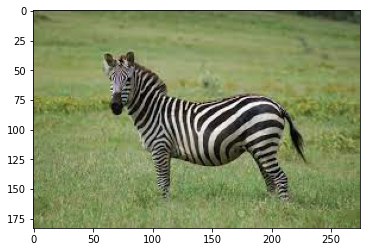

In [54]:
img = cv.imread('zebra.jfif')
img = cv.GaussianBlur(img, (3, 3), 0)

plt.figure()
plt.imshow(img_rgb)
plt.show()

In [55]:
# Convert the image to HSV
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# reshape and convert to float32
img_reshape = img_hsv.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

# Define criteria, attempts and number of clusters
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
K = 3

ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# Convert the center to np.uint8
center = np.uint8(center)
res = center[label.flatten()]
result_img = res.reshape(img_hsv.shape)

In [112]:
# Convert the image to HSV
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_reshape_rgb = img.reshape((-1, 3))
img_reshape_rgb = np.float32(img_reshape_rgb)

# Define criteria, attempts and number of clusters
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
K = 11

ret, label, center = cv.kmeans(img_reshape_rgb, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# Convert the center to np.uint8
center = np.uint8(center)
res = center[label.flatten()]
result_img_rgb = res.reshape(img_rgb.shape)

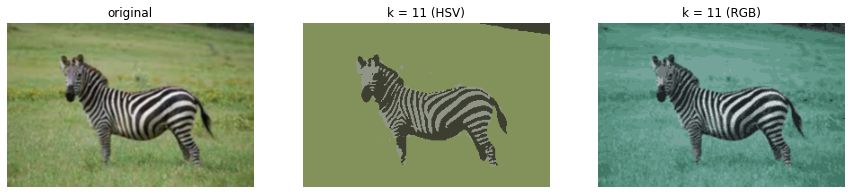

In [113]:
plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('original'), plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(result_img, cv.COLOR_HSV2RGB))
plt.title(f'k = {K} (HSV)'), plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(result_img_rgb)
plt.title(f'k = {K} (RGB)'), plt.axis("off")
plt.show()

in RGB color space with  k value above 10, the green surface will not cover the zebra but in the HSV color space, the k value from 2 to 11 will remain the same only the zebra segmented. So when the k value is above 10, RGB is better, when below 10, HSV better.